## Problem #3

Load the hotel data into R. Here’s a description of the data:

Dataset:  hotel_energy.csv

Source: Y. Xin, S. Lu, N. Zhu, W. Wu (2012). "Energy Consumption Quota of Four and Five Star Luxury Hotels Buildings in Hainan Province, China," Energy and Buildings, Vol. 45, pp. 250-256.

Description: Energy Consumption and attributes for 19 Luxury Hotels.

Variables/Labels

Hotel Id   (hotel)

Energy Consumption in Kilowatt-hours

Area in square meters   (area)

Age in years     (age)

Number of guestrooms    (numrooms)

Occupancy Rate in percent   (occrate)

Effective number of guestrooms  (effrooms = numrooms*occrate/100)

#### (a) Perform simple linear regression using energy consumption as the response and area as the predictor. Report a summary of your model.

In [1]:
hotel = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/hotel_0.txt", sep = ",", header = TRUE)
head(hotel)

hotel,enrgcons,area,age,numrooms,occrate,effrooms
1,1953916,43000,6,420,NA,136.92
2,1045555,19979,16,215,NA,135.45
3,4245313,46529,7,273,NA,177.59
4,2126199,20962,6,222,NA,156.51
5,2785958,24212,5,474,NA,330.38
6,13833968,112200,4,787,NA,385.39


In [2]:
lmod = lm(enrgcons ~ area, data = hotel)
summary(lmod)


Call:
lm(formula = enrgcons ~ area, data = hotel)

Residuals:
     Min       1Q   Median       3Q      Max 
-4355890  -872098     1538  1305292  3148838 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -538035.42 1085087.38  -0.496    0.626    
area            159.25      20.96   7.599 7.29e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2102000 on 17 degrees of freedom
Multiple R-squared:  0.7726,	Adjusted R-squared:  0.7592 
F-statistic: 57.75 on 1 and 17 DF,  p-value: 7.294e-07


#### (b) Is the slope coefficient significant at the α = 0.05 level?

The p-value for the t-test associated with the slope coefficient is smaller than any reasonable $\alpha$. So, yes, the slope term is statistically significant.

#### (c)  Interpret the slope coefficient in terms of the data.

Assuming that the model is correct, increasing a hotel's area by one square meter increases its energy consumption, on average, by 159.25 Kilowatt-hours.

#### (d) What percentage of the variability in energy consumption is explained by area?

About 77% of the variability in energy consumption is explained by area, assuming the model is correct. (This is the coefficient of determination, or, $R^2$).

#### (e) Now perform multiple linear regression with number of guest rooms, area, and age as predictors (same response). Report a summary of your model. Interpret the coefficient associated with area. Is it different from the SLR model?

In [3]:
lmod2 = lm(enrgcons ~ area + numrooms + age, data = hotel)
summary(lmod2)


Call:
lm(formula = enrgcons ~ area + numrooms + age, data = hotel)

Residuals:
     Min       1Q   Median       3Q      Max 
-3767734  -638009   492081   949224  3214282 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -828513.80 1958786.74  -0.423 0.678316    
area            196.19      40.34   4.863 0.000207 ***
numrooms      -6087.90    6500.87  -0.936 0.363863    
age          111834.20  133440.71   0.838 0.415140    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2112000 on 15 degrees of freedom
Multiple R-squared:  0.7974,	Adjusted R-squared:  0.7569 
F-statistic: 19.68 on 3 and 15 DF,  p-value: 1.853e-05


When adjusting for age, and the number of rooms, increasing a hotel's area by one square meter increases its energy consumption, on average, by 196.19 Kilowatt-hours.

#### (f) Plot the residuals against the fitted values (for the MLR model). Does this plot suggest that any regression assumptions are violated?

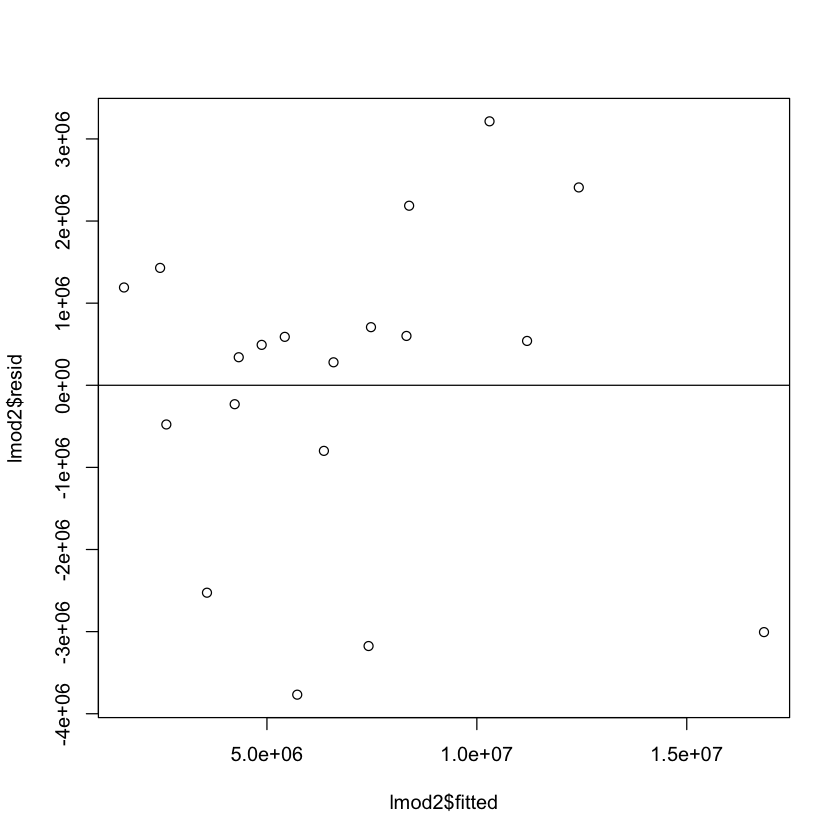

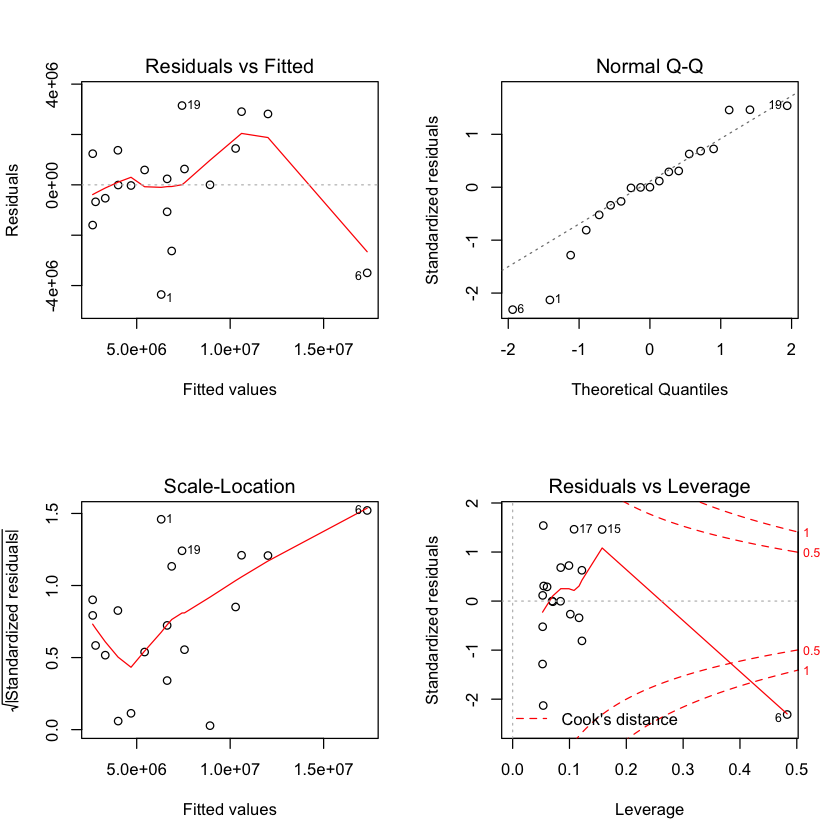

In [6]:
plot(lmod2$fitted, lmod2$resid); abline(0,0)
par(mfrow = c(2,2)); plot(lmod)

It's a bit hard to tell just from this plot whether any assumptions are violated. There doesn't seem to be any clear curvature to the plot (which would indicate a missing predictor or a violation of linearity) or some sort of "trumpet" pattern, which would indicate a violation of the constant variance assumption.

#### (g) Interpret the coefficient associated with the number of guest rooms. Is there anything that seems odd about this interpretation?

The energy consumption, on average, goes *down* by 6087.90 Kwh, when adding a room, for a constant area and age. This might seem odd at first, but since the regression adjusts for area, it makes some sense: more rooms in the same area might make for a more efficient use of energy. Also, note that the p-value associated with this coefficient is large, and so we might be justified in leavning this predictor out of the model.

#### (h) Perform a formal test to decide whether the MLR model is necessary, or whether the SLR model will do. Interpret the results.

In [5]:
anova(lmod2, lmod)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
15,6.693065e+13,NA,NA,NA,NA
17,7.512937e+13,-2,-8.198719e+12,0.9187179,0.4203536


The F-test performed above suggests that the reduced model is sufficient (i.e., the p-value, 0.4203536, is high, and we can't reject the null that the reduced model is sufficient).

## Problem #4

In this question, we'll consider how $R^2$ might be misinterpreted. 

#### (a) Randomly choose $n = 100$ $x$ values between zero and one. Then, simulate $Y$ data such that $Y_i = 1 + 2X_i + \varepsilon_i$, where $\varepsilon_i \sim N(0,25)$. Fit a linear regression model in R and report $R^2$.

In [4]:
n = 100; x = runif(n,0,1); y = 1 + 2*x + rnorm(n, 0, 5)
lmod = lm(y~x); summary(lmod)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.2185  -3.7085  -0.3054   3.1895  15.7540 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    1.462      1.045   1.398    0.165
x              2.133      1.831   1.165    0.247

Residual standard error: 4.956 on 98 degrees of freedom
Multiple R-squared:  0.01366,	Adjusted R-squared:  0.003597 
F-statistic: 1.357 on 1 and 98 DF,  p-value: 0.2468


#### (b) True or False: A simple linear regression model may be correct (i.e., it represents the way that the data were generated) but $R^2 \approx 0$. 

True. Above, $R^2 = 0.01366$, but the model is correct, i.e., the true relationship between $X$ and $Y$ is linear.

#### (c) Now use the values from part (a), and let $y = x^2$. So, $y$ and $x$ are perfectly related, but not linearly. Fit a simple linear regression model in R and report $R^2$. 


Call:
lm(formula = y2 ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07387 -0.05898 -0.02952  0.05247  0.16948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.20391    0.01499  -13.61   <2e-16 ***
x            1.05412    0.02625   40.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07106 on 98 degrees of freedom
Multiple R-squared:  0.9427,	Adjusted R-squared:  0.9421 
F-statistic:  1613 on 1 and 98 DF,  p-value: < 2.2e-16


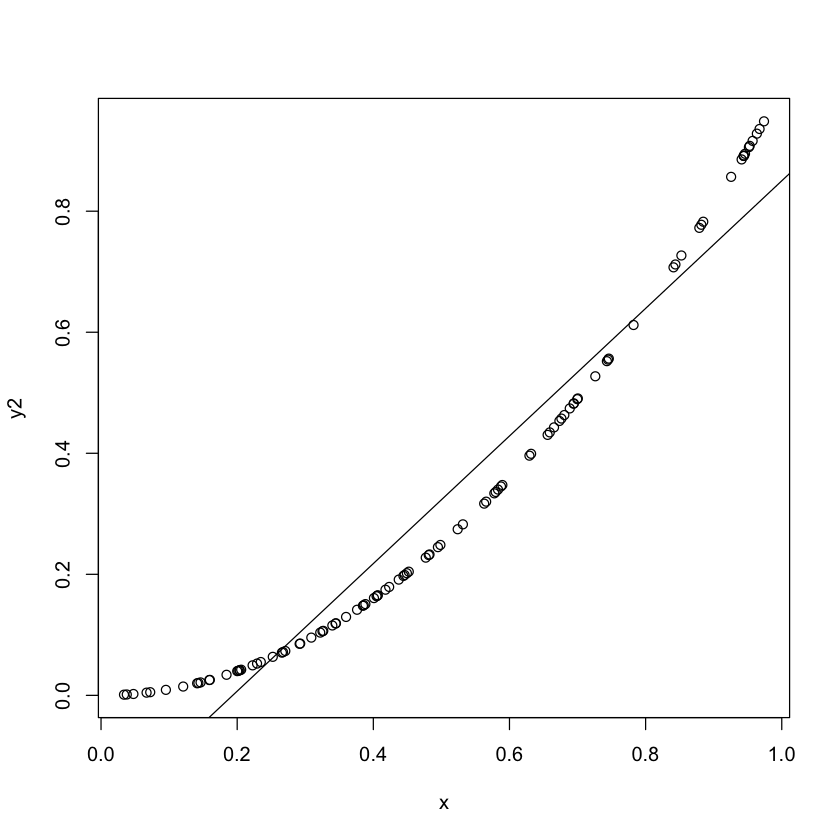

In [7]:
y2 = x^2
lmod2 = lm(y2 ~ x)
summary(lmod2)
plot(x,y2); abline(lmod2)

#### (d) True or False: A simple linear regression model may be incorrect (i.e., it does not represent the way that the data were generated) but $R^2 \approx 1$. 

True. In part (c), the model is clearly incorrect, but $R^2$ is close to one.